# LOGISTIC REGRESSION (Part II)



## 1. Logistic Regression (Numerical + Categorical Variables)

### 1.1 Data Loading

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


### 1.2 Train Test Split

In [ ]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=88)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

### 1.3 Model Fitting and Variable Selection

In [ ]:
logreg = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2695
Time:                        22:17:15   Log-Likelihood:                -2076.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8982      0.213     -4

In [ ]:
# Let's remove MonthlyCharges
logreg2 = smf.logit(formula = 'Churn ~ SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.422264
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2688
Time:                        22:18:15   Log-Likelihood:                -2078.4
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5748      0.122     -4

In [ ]:
# Let's remove PaymentMethod Credit Card and PaymentMethod Mailed check. How do we do this?
# Create a new feature (dummy variable).

churn_train2 = churn_train.copy()
churn_train2['ElectronicCheck'] = (churn_train2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_train2.drop(columns=['PaymentMethod'], inplace=True)

# Let's do the same for test set as well

churn_test2 = churn_test.copy()
churn_test2['ElectronicCheck'] = (churn_test2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_test2.drop(columns=['PaymentMethod'], inplace=True)

churn_test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
2839,1,99.60,1,Fiber optic,4,Month-to-month,1
4965,0,93.80,1,Fiber optic,13,Month-to-month,0
6686,0,96.55,0,Fiber optic,5,Month-to-month,1
4151,0,25.20,0,No,39,Two year,0
241,0,109.20,0,Fiber optic,72,Two year,0


In [ ]:
logreg3 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = churn_train2).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.422336
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2687
Time:                        22:22:25   Log-Likelihood:                -2078.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6254      0.085     -7.363     

### 1.4 Predicting the Probability and Deciding the Threshold

In [ ]:
# 1. Predicting the probability of default
y_prob = logreg3.predict(churn_test2)

# 2. Determining the optimal threshold of the default probability
## price reduction = 800 and no price reduction = 1000
## 800 (1 - p/2) = 1000 (1 - p) -> p = 0.333 (Slides 47-48, Lecture 7).
## The threshold of high churn-risk and low churn-risk is 0.333.
## If p > 1/3, then we consider high churn-risk and give them the price reduction because
## our expected profit for no price reduction > expected profit for price reduction

# 3. Predicting the label
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

### 1.5 Confusion Matrix Given a Decision Threshold

In [ ]:
# Now we have our probabiltiy of default, we can construct a confusion matrix based on decision tree threshold we have computed
# price reduction = 800 and no price reduction = 1000
# 800 (1 - p/2) = 1000 (1 - p) -> p = 0.333 (Slides 47-48, Lecture 7).
# High churn risk > 0.333.
# or high churn risk, the expected return of discount is higher than no discount, b/c the prob of retention is lower for no discount

from sklearn.metrics import confusion_matrix
y_test = churn_test2['Churn']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
# Note that this confusion matrix is slightly different from the results presented in Lecture 7 slides. Those numbers
# were generated by the R program in the previous semester, which had a different random.seed and therefore a different
# train test split.

Confusion Matrix : 
 [[1213  329]
 [ 154  414]]


### 1.7 ROC Curves

The ROC curve plots the TPR and FPR for every break-even threshold p between 0.0 and 1.0

In [ ]:
y_train = churn_train2['Churn']
X_train = churn_train2.drop(['Churn'], axis=1)

y_test = churn_test2['Churn']
X_test = churn_test2.drop(['Churn'], axis=1)

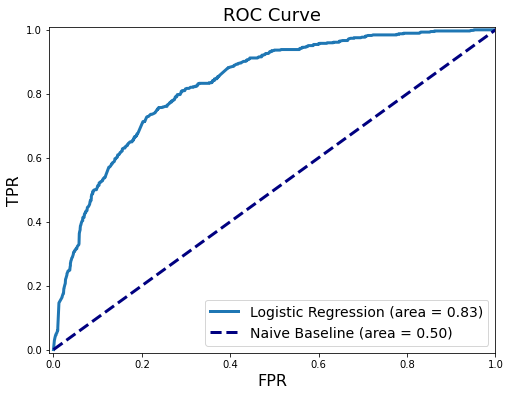

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()